In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import load_datasets
from utils.model_utils import initialize_model
from utils.train_utils import train_model
from utils.metrics import evaluate_model
from utils.visualization import plot_training, plot_confusion_matrix

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 32
num_epochs = 10
learning_rate = 0.001
num_classes = 2

In [5]:
print("[INFO] Loading augmented datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="augmented")
print("[INFO] Augmented datasets loaded successfully!")



[INFO] Loading augmented datasets...
[INFO] Augmented datasets loaded successfully!


In [6]:
print("\n[INFO] Starting Training for Model: vgg16 with Augmented Data\n")
print("[INFO] Initializing VGG16 model...")
model = initialize_model(
    model_name="vgg16",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Augmented data: still freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Training for Model: vgg16 with Augmented Data

[INFO] Initializing VGG16 model...


C:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[INFO] Model initialized successfully!


In [7]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
print("[INFO] Starting model training with augmented data...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for this stage
    # num_epochs=num_epochs,
    device=device,
    save_path="outputs/models/augmented/vgg_16.pt",
    early_stop_patience=5,     # Stop after 5 epochs without improvement
    monitor_metric="val_recall",

)
print("[INFO] Training completed successfully!")

[INFO] Starting model training with augmented data...

Starting training...



Epoch [1]:
    Train Loss: 0.6810, Train Acc: 0.7356
    Val Loss:   0.4906, Val Acc:   0.7910
    Val Recall: 0.7276, Val F1:   0.8100
    Learning Rate: 0.001000

[INFO] Best model saved with val_recall: 0.7276


Epoch [2]:
    Train Loss: 0.3866, Train Acc: 0.8410
    Val Loss:   0.3969, Val Acc:   0.8632
    Val Recall: 0.8699, Val F1:   0.8861
    Learning Rate: 0.001000

[INFO] Best model saved with val_recall: 0.8699


Epoch [3]:
    Train Loss: 0.3617, Train Acc: 0.8802
    Val Loss:   0.7380, Val Acc:   0.7886
    Val Recall: 0.6911, Val F1:   0.8000
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 1/5


Epoch [4]:
    Train Loss: 0.4431, Train Acc: 0.8590
    Val Loss:   0.4347, Val Acc:   0.8458
    Val Recall: 0.8618, Val F1:   0.8724
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 2/5


Epoch [5]:
    Train Loss: 0.3313, Train Acc: 0.8792
    Val Loss:   0.4735, Val Acc:   0.8383
    Val Recall: 0.9634, Val F1:   0.8794
    Learning Rate: 0.001000

[INFO] Best model saved with val_recall: 0.9634


Epoch [6]:
    Train Loss: 0.3165, Train Acc: 0.8792
    Val Loss:   0.3938, Val Acc:   0.8557
    Val Recall: 0.8821, Val F1:   0.8821
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 1/5


Epoch [7]:
    Train Loss: 0.2867, Train Acc: 0.8983
    Val Loss:   0.5374, Val Acc:   0.8358
    Val Recall: 0.9472, Val F1:   0.8759
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 2/5


Epoch [8]:
    Train Loss: 0.3131, Train Acc: 0.9083
    Val Loss:   0.4379, Val Acc:   0.8557
    Val Recall: 0.8089, Val F1:   0.8728
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 3/5


Epoch [9]:
    Train Loss: 0.2402, Train Acc: 0.9152
    Val Loss:   0.5489, Val Acc:   0.8781
    Val Recall: 0.9268, Val F1:   0.9030
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 4/5


Epoch [10]:
    Train Loss: 0.2186, Train Acc: 0.9258
    Val Loss:   0.5018, Val Acc:   0.8632
    Val Recall: 0.9187, Val F1:   0.8915
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 5/5
[INFO] Training stopped after 10 epochs.

[INFO] Training completed successfully!


In [9]:
# Evaluate Model
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device
)
print(f"\n[INFO] Metrics for VGG16 with Augmented Data:\n{metrics}")

[INFO] Evaluating the model...

[INFO] Metrics for VGG16 with Augmented Data:
{'classification_report': {'No Fire': {'precision': 0.8774193548387097, 'recall': 0.8553459119496856, 'f1-score': 0.8662420382165605, 'support': 159.0}, 'Fire': {'precision': 0.9098039215686274, 'recall': 0.9243027888446215, 'f1-score': 0.9169960474308301, 'support': 251.0}, 'accuracy': 0.8975609756097561, 'macro avg': {'precision': 0.8936116382036685, 'recall': 0.8898243503971535, 'f1-score': 0.8916190428236953, 'support': 410.0}, 'weighted avg': {'precision': 0.8972450286172691, 'recall': 0.8975609756097561, 'f1-score': 0.8973133950770037, 'support': 410.0}}, 'confusion_matrix': array([[136,  23],
       [ 19, 232]]), 'roc_auc': np.float64(0.8898243503971536)}


[INFO] Saving training and evaluation results...


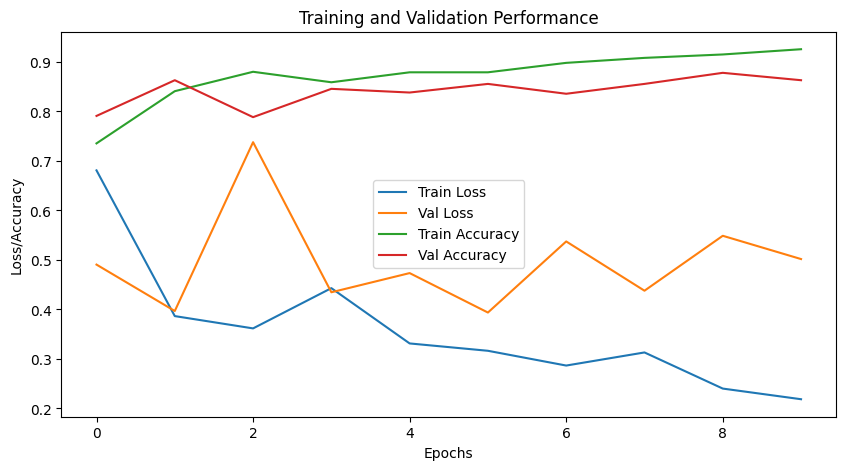

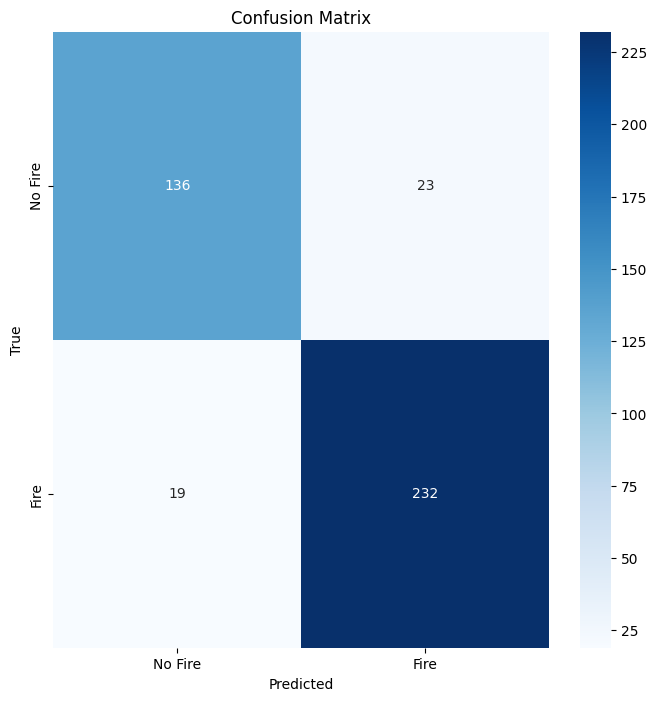

[INFO] Results saved successfully!


In [10]:
# Save Plots
print("[INFO] Saving training and evaluation results...")
plot_training(history, "outputs/vgg16_augmented_training_curve.png")
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path="outputs/vgg16_augmented_confusion_matrix.png"
)
print("[INFO] Results saved successfully!")